** Question 1 **

In [38]:
#1a
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv('customers.csv')

#Display first 5 rows of DataFrame
print("--- First 5 Rows of the DataFrame ---")
print(df.head())
print("\n" + "-"*40 + "\n") #Adding separator

print("--- DataFrame Info ---")
df.info()
print("\n" + "-"*40 + "\n") #Adding separator

print("--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows of the DataFrame ---
   customer_id             name  age             city  \
0            1      John Rivers   31       New Angela   
1            2  Richard Mcclure   21        Jamieside   
2            3       Eric Smith   34   Port Mariastad   
3            4      Megan Price   47   South Samantha   
4            5     Pedro Guzman   20  South Laurabury   

                        country subscription_date  
0         Sao Tome and Principe        2024-09-17  
1  Svalbard & Jan Mayen Islands        2021-07-19  
2                     Nicaragua        2025-06-08  
3                        Turkey        2021-12-09  
4                     Mauritius        2023-03-11  

----------------------------------------

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    int6

In [39]:
#1b
print("--- Question 1b: Age Statistics ---")

#Calculate the mean and standard deviation of age column 
mean_age = np.mean(df['age'])
std_dev_age = np.std(df['age'])

print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}\n")

#Create boolean array to identify customers under 25
is_under_25 = df['age'] < 25
print("Boolean array for the first 5 customers under 25:")
print(is_under_25.head())
print("-" * 30)

--- Question 1b: Age Statistics ---
Mean Age: 44.70
Standard Deviation of Age: 17.38

Boolean array for the first 5 customers under 25:
0    False
1     True
2    False
3    False
4     True
Name: age, dtype: bool
------------------------------


In [40]:
#1c
print("\n--- Question 1c: Filtering for Customers Under 25 ---")

# Use the boolean array 'is_under_25' to filter the DataFrame
# This selects only the rows where the 'is_under_25' value is True
customers_under_25 = df[is_under_25]

# Display the resulting DataFrame
print("Displaying all customers under the age of 25:")
print(customers_under_25)
print("-" * 30)


--- Question 1c: Filtering for Customers Under 25 ---
Displaying all customers under the age of 25:
    customer_id              name  age                 city  \
1             2   Richard Mcclure   21            Jamieside   
4             5      Pedro Guzman   20      South Laurabury   
10           11       Erin Lucero   21            Smithland   
37           38     Jerry Johnson   22       Lake Ashleyton   
39           40      Leroy Santos   18    South Thomasmouth   
46           47    Tiffany Arnold   21     South Samuelport   
47           48  Meredith Johnson   21         Foleychester   
56           57     Vanessa Perez   24         East Vincent   
58           59        Joel Brown   24  West Jefferyborough   
61           62    Cathy Anderson   22     South Oliviaside   
71           72     Denise Miller   20             Myerston   
75           76      Gerald Smith   18  Lake Anthonychester   
81           82   Victoria Miller   18        Port Nicholas   
86           87  

In [41]:
#1d
print("\n--- Question 1d: Creating the 'age_group' Column ---")

#Define the bins and corresponding labels for groups
bins = [0, 24, 59, float('inf')]
labels = ['Youth', 'Adult', 'Senior']

#Create age_group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

#Display
print("DataFrame with the new 'age_group' column:")
print(df.head(10))
print("-" * 30)


--- Question 1d: Creating the 'age_group' Column ---
DataFrame with the new 'age_group' column:
   customer_id             name  age             city  \
0            1      John Rivers   31       New Angela   
1            2  Richard Mcclure   21        Jamieside   
2            3       Eric Smith   34   Port Mariastad   
3            4      Megan Price   47   South Samantha   
4            5     Pedro Guzman   20  South Laurabury   
5            6    Thomas Morgan   61       Hannahland   
6            7      Derek Lewis   36    East Jennifer   
7            8    James Fuentes   26        New Larry   
8            9       Karen Pace   48     Daniellefort   
9           10      Austin Beck   69      Valerietown   

                        country subscription_date age_group  
0         Sao Tome and Principe        2024-09-17     Adult  
1  Svalbard & Jan Mayen Islands        2021-07-19     Youth  
2                     Nicaragua        2025-06-08     Adult  
3                        Tu

** Question 2 **

In [42]:
#2a
print("\n--- Question 2a: Working with Dates ---")

#Convert subscription_date to datetime
df['subscription_date'] = pd.to_datetime(df['subscription_date'])

#Extract columns
df['year_joined'] = df['subscription_date'].dt.year
df['month_joined'] = df['subscription_date'].dt.month
df['quarter_joined'] = df['subscription_date'].dt.quarter

print("DataFrame with new date columns:")
print(df[['subscription_date', 'year_joined', 'month_joined', 'quarter_joined']].head())
print("-" * 30)


--- Question 2a: Working with Dates ---
DataFrame with new date columns:
  subscription_date  year_joined  month_joined  quarter_joined
0        2024-09-17         2024             9               3
1        2021-07-19         2021             7               3
2        2025-06-08         2025             6               2
3        2021-12-09         2021            12               4
4        2023-03-11         2023             3               1
------------------------------


In [43]:
#2b
print("\n--- Question 2b: GroupBy Age Group ---")

#Calculate average age and subscription year per age_group
age_group_stats = df.groupby('age_group')[['age', 'year_joined']].mean()

print("Average age and join year by age group:")
print(age_group_stats)
print("-" * 30)


--- Question 2b: GroupBy Age Group ---
Average age and join year by age group:
                 age  year_joined
age_group                        
Youth      20.764706  2022.058824
Adult      41.036364  2022.545455
Senior     66.428571  2022.892857
------------------------------


C:\Users\josh\AppData\Local\Temp\ipykernel_21508\3795264496.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')[['age', 'year_joined']].mean()



--- Question 2c: Bar Chart (Sign-ups per Year) ---
Displaying bar chart...


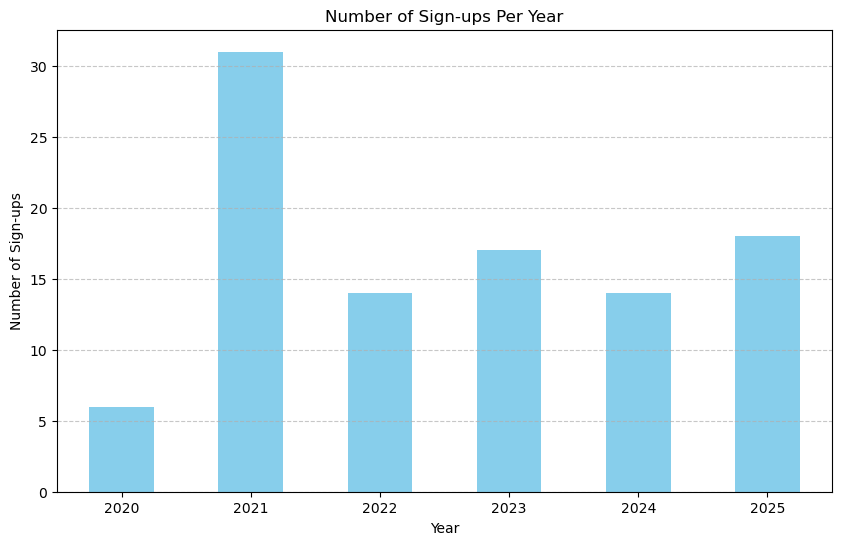

In [44]:
#2c
print("\n--- Question 2c: Bar Chart (Sign-ups per Year) ---")

#Get counts for each year and sort by year
signups_per_year = df['year_joined'].value_counts().sort_index()

#Creating the graph
plt.figure(figsize=(10, 6)) 
signups_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Sign-ups Per Year') 
plt.xlabel('Year') 
plt.ylabel('Number of Sign-ups') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
print("Displaying bar chart...")

plt.show()


--- Question 2d: Pie Chart (Distribution by Age Group) ---
Displaying pie chart...


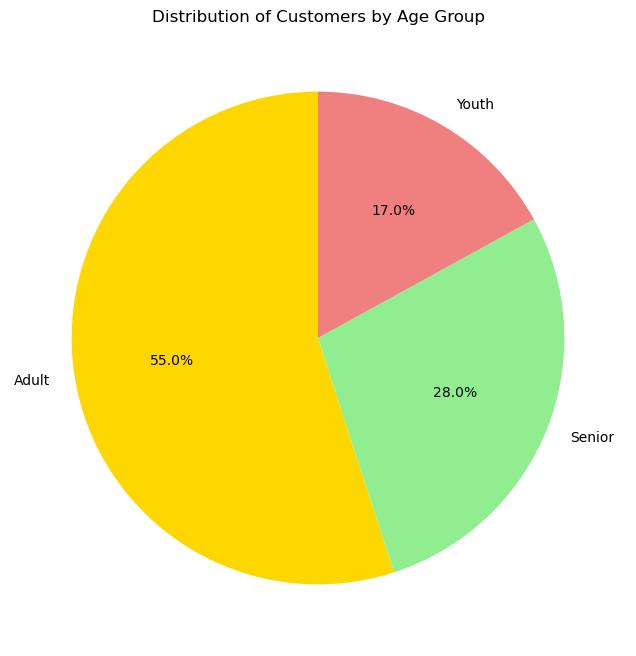

In [45]:
#2d
print("\n--- Question 2d: Pie Chart (Distribution by Age Group) ---")

#Get counts for each age group
age_group_distribution = df['age_group'].value_counts()

plt.figure(figsize=(8, 8))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Customers by Age Group')
plt.ylabel('') 
print("Displaying pie chart...")

plt.show()

In [46]:
#2e
print("\n--- Question 2e: Saving the Cleaned Dataset ---")

#Save the DataFrame to CSV
#index=False stops the pandas index from beig saved
df.to_csv('community_customers_cleaned.csv', index=False)

print("Cleaned dataset saved as 'community_customers_cleaned.csv'")
print("-" * 30)


--- Question 2e: Saving the Cleaned Dataset ---
Cleaned dataset saved as 'community_customers_cleaned.csv'
------------------------------


** Question 3 *

In [47]:
print("\n" + "="*50 + "\n")
print("--- Starting Question 3: Health Data Analysis ---")
print("="*50 + "\n")

#3a
print("\n--- Question 3a: Load and Explore health_data.csv ---")

#Load dataset
df_health = pd.read_csv('health_data.csv')

#Explore
print("--- First 5 Rows ---")
print(df_health.head())
print("\n--- DataFrame Info ---")
df_health.info()

#Identify missing
print("\n--- Missing Values ---")
print(df_health.isnull().sum())

#Identify duplicates
print("\n--- Duplicate Rows ---")
print(f"Number of duplicate rows: {df_health.duplicated().sum()}")

#Explore numerical data
print("\n--- Descriptive Statistics ---")
print(df_health.describe())
print("-" * 30)



--- Starting Question 3: Health Data Analysis ---


--- Question 3a: Load and Explore health_data.csv ---
--- First 5 Rows ---
  patient_id  age     sex   BMI  blood_pressure  disease_score
0      P0001   69  Female  20.3             106             89
1      P0002   32  Female  32.0             122             47
2      P0003   89    Male  24.9              98             84
3      P0004   78    Male  16.6             132             38
4      P0005   38    Male  19.6             137             99

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      100 non-null    object 
 1   age             100 non-null    int64  
 2   sex             100 non-null    object 
 3   BMI             100 non-null    float64
 4   blood_pressure  100 non-null    int64  
 5   disease_score   100 non-null    int64  
dtypes

In [48]:
#3b
print("\n--- Question 3b: Clean blood_pressure Column ---")

#extract first number and convert to float
#cleans data like 120/80 by extracting 120
df_health['blood_pressure_cleaned'] = df_health['blood_pressure'].astype(str).str.extract(r'(\d+)').astype(float)

print("Blood pressure column cleaned (showing first 5):")
print(df_health[['blood_pressure', 'blood_pressure_cleaned']].head())
print("-" * 30)


--- Question 3b: Clean blood_pressure Column ---
Blood pressure column cleaned (showing first 5):
   blood_pressure  blood_pressure_cleaned
0             106                   106.0
1             122                   122.0
2              98                    98.0
3             132                   132.0
4             137                   137.0
------------------------------


In [49]:
#3c
print("\n--- Question 3c: Create risk_level Column ---")

#Define function
def classify_risk(row):
    if (row['BMI'] > 30) and (row['disease_score'] > 80):
        return 'High'
    elif (row['BMI'] > 25) and (row['disease_score'] > 60):
        return 'Medium'
    else:
        return 'Low'

#Apply the function
df_health['risk_level'] = df_health.apply(classify_risk, axis=1)

print("DataFrame with new 'risk_level' column:")
print(df_health[['BMI', 'disease_score', 'risk_level']].head(10))
print("-" * 30)


--- Question 3c: Create risk_level Column ---
DataFrame with new 'risk_level' column:
    BMI  disease_score risk_level
0  20.3             89        Low
1  32.0             47        Low
2  24.9             84        Low
3  16.6             38        Low
4  19.6             99        Low
5  20.0             32        Low
6  25.5             93     Medium
7  22.8            100        Low
8  21.7             22        Low
9  25.0              9        Low
------------------------------


In [50]:
#3d
print("\n--- Question 3d: GroupBy risk_level ---")

#Calculate average BMI and disease score per risk_level
risk_group_stats = df_health.groupby('risk_level')[['BMI', 'disease_score']].mean()

print("Average BMI and Disease Score by Risk Level:")
print(risk_group_stats)
print("-" * 30)


--- Question 3d: GroupBy risk_level ---
Average BMI and Disease Score by Risk Level:
                  BMI  disease_score
risk_level                          
High        31.600000      91.250000
Low         24.824359      43.025641
Medium      28.172222      79.611111
------------------------------



--- Question 3e: Box Plot and Histogram ---
Displaying box plot and histogram...


C:\Users\josh\AppData\Local\Temp\ipykernel_21508\1550690347.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(bmi_data_by_risk, labels=risk_order)


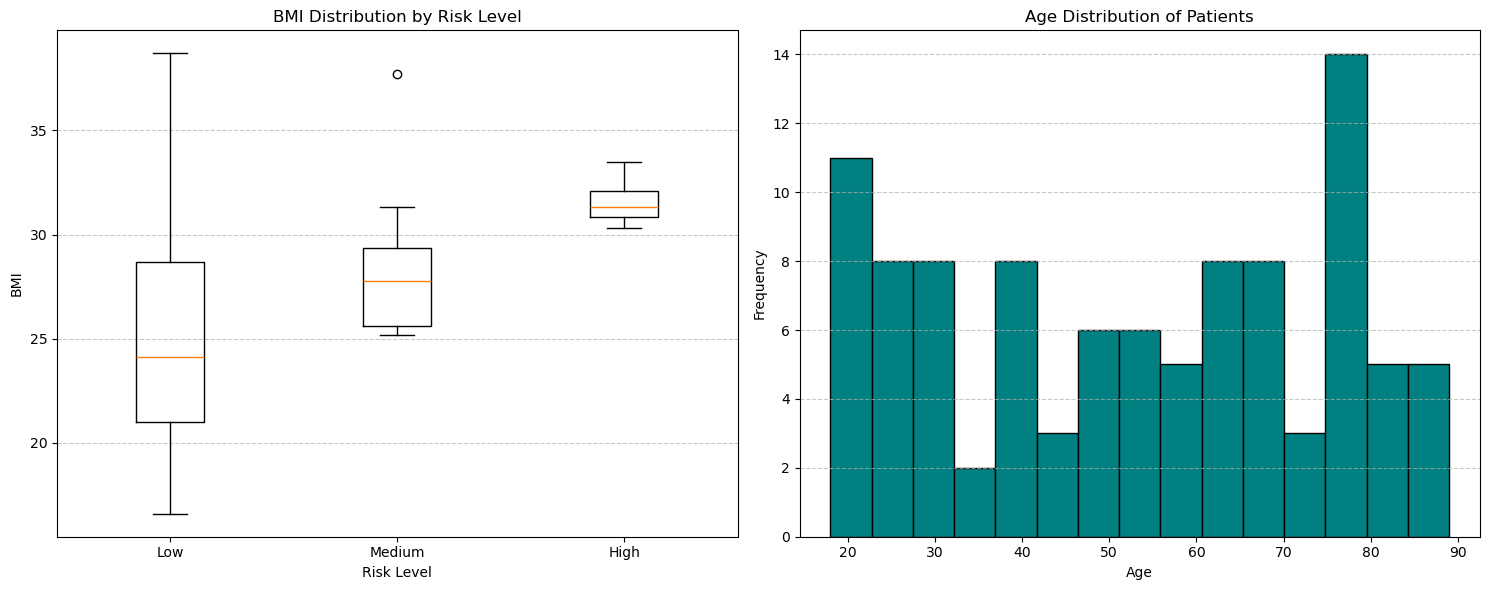

In [51]:
#3e
print("\n--- Question 3e: Box Plot and Histogram ---")

#Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Plot 1
risk_order = ['Low', 'Medium', 'High']
bmi_data_by_risk = [df_health['BMI'][df_health['risk_level'] == level] for level in risk_order]

ax1.boxplot(bmi_data_by_risk, labels=risk_order)
ax1.set_title('BMI Distribution by Risk Level')
ax1.set_xlabel('Risk Level')
ax1.set_ylabel('BMI')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

#Plot 2
ax2.hist(df_health['age'], bins=15, color='teal', edgecolor='black')
ax2.set_title('Age Distribution of Patients')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
print("Displaying box plot and histogram...")

plt.show()

** Question 4 **

In [52]:
import sqlite3

print("\n" + "="*50 + "\n")
print("--- Starting Question 4: SQL Database ---")
print("="*50 + "\n")

#4a
print("\n--- Question 4a: Load DataFrame into SQLite ---")

#Create connection to a new database file
conn = sqlite3.connect('health_registry.db')

#load the DataFrame into a table named patients
df_health.to_sql('patients', conn, if_exists='replace', index=False)

print("Successfully loaded 'df_health' into 'patients' table in 'health_registry.db'")
print("-" * 30)

#4b
print("\n--- Question 4b: Count Patients by Sex and Risk Level ---")

#Write query
query_b = """
SELECT 
    sex, 
    risk_level, 
    COUNT(*) AS patient_count
FROM 
    patients
GROUP BY 
    sex, risk_level
"""

#Run query and display the result
df_b = pd.read_sql_query(query_b, conn)
print("Query Results:")
print(df_b)
print("-" * 30)

#4c
print("\n--- Question 4c: Average Disease Score by Age Group ---")

#Write the SQL query using CASE for age groups
query_c = """
    SELECT
        CASE
            WHEN age < 25 THEN 'Youth'
            WHEN age >= 25 AND age < 60 THEN 'Adult'
            ELSE 'Senior'
        END AS age_group,
        AVG(disease_score) AS avg_disease_score
    FROM 
        patients
    GROUP BY 
        age_group
"""

df_c = pd.read_sql_query(query_c, conn)
print("Query Results:")
print(df_c)
print("-" * 30)

#4d
print("\n--- Question 4d: Classify Patient Status and Export ---")

#create the patient_status column
#assume High risk is Critical and all others are Stable
query_d = """
    SELECT
        patient_id,
        age,
        BMI,
        disease_score,
        risk_level,
        CASE
            WHEN risk_level = 'High' THEN 'Critical'
            ELSE 'Stable'
        END AS patient_status
    FROM 
        patients
"""

df_d = pd.read_sql_query(query_d, conn)

#Save results to new CSV file
df_d.to_csv('patient_status_report.csv', index=False)

print("Query Results (first 5 rows):")
print(df_d.head())
print("\nSuccessfully exported full report to 'patient_status_report.csv'")
print("-" * 30)

#Close the database connection
conn.close()
print("Database connection closed.")



--- Starting Question 4: SQL Database ---


--- Question 4a: Load DataFrame into SQLite ---
Successfully loaded 'df_health' into 'patients' table in 'health_registry.db'
------------------------------

--- Question 4b: Count Patients by Sex and Risk Level ---
Query Results:
      sex risk_level  patient_count
0  Female       High              2
1  Female        Low             36
2  Female     Medium              6
3    Male       High              2
4    Male        Low             42
5    Male     Medium             12
------------------------------

--- Question 4c: Average Disease Score by Age Group ---
Query Results:
  age_group  avg_disease_score
0     Adult          51.395349
1    Senior          51.790698
2     Youth          51.214286
------------------------------

--- Question 4d: Classify Patient Status and Export ---
Query Results (first 5 rows):
  patient_id  age   BMI  disease_score risk_level patient_status
0      P0001   69  20.3             89        Low         Sta

4e
Database indexes improve performance by making the query process a lot more efficient. If this database had hundreds of thousands of records a query like SELECT * FROM patients WHERE risk_level = 'High' would be very slow as every single row would need to be checked one by one. Adding an index to this database like risk_level allows the program to find entries quickly without having to check every single record in the database.